In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
print(x_train[9])

[1, 14, 20, 47, 111, 439, 3445, 19, 12, 15, 166, 12, 216, 125, 40, 6, 364, 352, 707, 1187, 39, 294, 11, 22, 396, 13, 28, 8, 202, 12, 1109, 23, 94, 2, 151, 111, 211, 469, 4, 20, 13, 258, 546, 1104, 7273, 12, 16, 38, 78, 33, 211, 15, 12, 16, 2849, 63, 93, 12, 6, 253, 106, 10, 10, 48, 335, 267, 18, 6, 364, 1242, 1179, 20, 19, 6, 1009, 7, 1987, 189, 5, 6, 8419, 7, 2723, 2, 95, 1719, 6, 6035, 7, 3912, 7144, 49, 369, 120, 5, 28, 49, 253, 10, 10, 13, 1041, 19, 85, 795, 15, 4, 481, 9, 55, 78, 807, 9, 375, 8, 1167, 8, 794, 76, 7, 4, 58, 5, 4, 816, 9, 243, 7, 43, 50]


In [4]:
y_train[9]

0

In [5]:
word_index = imdb.get_word_index()
word_index

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [6]:
reverse_word_index = dict(
		[(value, key) for (key, value) in word_index.items()]
)

In [7]:
for i in range(1,31):
	print(i, '=', reverse_word_index[i])

1 = the
2 = and
3 = a
4 = of
5 = to
6 = is
7 = br
8 = in
9 = it
10 = i
11 = this
12 = that
13 = was
14 = as
15 = for
16 = with
17 = movie
18 = but
19 = film
20 = on
21 = not
22 = you
23 = are
24 = his
25 = have
26 = he
27 = be
28 = one
29 = all
30 = at


In [8]:
decoded_review = ' '.join(
		[reverse_word_index[i] for i in x_train[9]]
)
decoded_review

"the as on there plot she's iii film that for find that saw better just is along wrong silly awesome or play this you doing was one in own that successful are make and old plot gets unfortunately of on was although except value omar that with her do they gets for that with timing really way that is played character i i what poor set but is along 100 studio on film is missing br received fact to is mercifully br fabulous and them powers is tapes br enjoys indicate good women show to one good played i i was plain film because avoid for of totally it time do period it couple in college in viewers get br of my to of material it yet br out more"

In [9]:
def vectorize_sequences(sequences, dimension=10000):
		results = np.zeros((len(sequences), dimension))
		for i, sequence in enumerate(sequences):
			results[i, sequence] = 1.
		return results

In [10]:
x_train = vectorize_sequences(x_train)
x_test = vectorize_sequences(x_test)

In [11]:
len(x_train[9])

10000

In [12]:
x_train[9]

array([0., 1., 1., ..., 0., 0., 0.])

In [13]:
x_train.shape

(25000, 10000)

In [14]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.compile(optimizer='rmsprop',
	loss='binary_crossentropy',
	metrics=['accuracy'])

In [16]:
textmodel = model.fit(x_train, y_train, epochs=20, batch_size=128,
	validation_split=0.1)

Epoch 1/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7961 - loss: 0.4646 - val_accuracy: 0.8916 - val_loss: 0.2783
Epoch 2/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9242 - loss: 0.2086 - val_accuracy: 0.8896 - val_loss: 0.2886
Epoch 3/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9452 - loss: 0.1537 - val_accuracy: 0.8912 - val_loss: 0.3013
Epoch 4/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9554 - loss: 0.1246 - val_accuracy: 0.8836 - val_loss: 0.3367
Epoch 5/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9651 - loss: 0.1022 - val_accuracy: 0.8828 - val_loss: 0.3615
Epoch 6/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9696 - loss: 0.0879 - val_accuracy: 0.8772 - val_loss: 0.3934
Epoch 7/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9777 - loss: 0.0695 - val_accuracy: 0.8764 - val_loss: 0.4273
Epoch 8/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9837 - loss: 0.0536 - val_accuracy: 0.

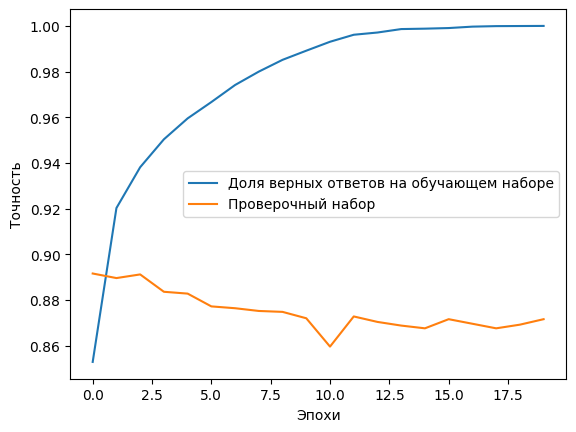

In [18]:
plt.plot(textmodel.history['accuracy'],
		label='Доля верных ответов на обучающем наборе')
plt.plot(textmodel.history['val_accuracy'],
		label='Проверочный набор')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.legend()
plt.show()

In [19]:
finalscore = model.evaluate(x_test, y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 751us/step - accuracy: 0.8481 - loss: 1.5547


In [20]:
finalscore

[1.5341167449951172, 0.8517600297927856]